# Import libraries

In [126]:
import matplotlib.pyplot as plt
import pandas as pd
import pgmpy

In [63]:
df=pd.read_csv("datasets-HR-Employee-Attrition.csv")

# Encode Catogorical attributes

In [64]:
m=df.select_dtypes(include=['object']).columns
for i in m:
    df[i] = df[i].astype('category')
    df[i] = df[i].cat.codes

# Finding four correlated Features

In [65]:
corrmat = df.corr()
corrmat.sort_values("Attrition",inplace=True)
corrmat

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
TotalWorkingYears,0.680381,-0.171063,0.034226,0.014515,-0.015762,0.004628,0.148280,-0.027848,NaN,-0.014365,...,0.024054,NaN,0.010136,1.000000,-0.035662,0.001008,0.628133,0.460365,0.404858,0.459188
JobLevel,0.509604,-0.169105,0.019311,0.002966,0.101963,0.005303,0.101589,-0.044933,NaN,-0.018519,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
YearsInCurrentRole,0.212901,-0.160545,-0.011497,0.009932,0.056315,0.018845,0.060236,-0.010506,NaN,-0.008416,...,-0.015123,NaN,0.050818,0.460365,-0.005738,0.049856,0.758754,1.000000,0.548056,0.714365
MonthlyIncome,0.497855,-0.159840,0.034319,0.007707,0.053130,-0.017014,0.094961,-0.041070,NaN,-0.014829,...,0.025873,NaN,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010145,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
YearsWithCurrManager,0.202089,-0.156199,-0.022636,-0.026363,0.034282,0.014406,0.069065,-0.004130,NaN,-0.009197,...,-0.000867,NaN,0.024698,0.459188,-0.004096,0.002759,0.769212,0.714365,0.510224,1.000000
StockOptionLevel,0.037510,-0.137145,-0.016727,0.042143,-0.012193,0.044872,0.018422,-0.016185,NaN,0.062227,...,-0.045952,NaN,1.000000,0.010136,0.011274,0.004129,0.015058,0.050818,0.014352,0.024698
YearsAtCompany,0.311309,-0.134392,-0.014575,-0.034055,0.022920,0.009508,0.069114,-0.018692,NaN,-0.011240,...,0.019367,NaN,0.015058,0.628133,0.003569,0.012089,1.000000,0.758754,0.618409,0.769212
JobInvolvement,0.029820,-0.130016,0.039062,0.046135,-0.024586,0.008783,0.042438,-0.002655,NaN,-0.006888,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobSatisfaction,-0.004892,-0.103481,-0.033962,0.030571,0.021001,-0.003669,-0.011296,-0.034401,NaN,-0.046247,...,-0.012454,NaN,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656


In [60]:
df4=df[["Attrition","TotalWorkingYears","JobLevel","OverTime","MaritalStatus"]]

#  Learning Bayesian Networks from Data

In [61]:
from pgmpy.estimators import ExhaustiveSearch
es = ExhaustiveSearch(df4, scoring_method=BicScore(df4))
best_model = es.estimate()
print(best_model.edges())
print("\nAll DAGs by score:")
for score, dag in reversed(es.all_scores()):
    print(score, dag.edges())

[('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'TotalWorkingYears')]

All DAGs by score:
-9607.627960798705 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-9607.627960798705 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition')]
-9607.627960798705 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition')]
-9607.627960798705 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'TotalWorkingYears')]
-9607.627960798707 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('OverTime', 'Attrition')]
-9611.722700003436 [('Attrition', 'JobLevel'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition')]
-9616.174886

-9637.770206269939 [('JobLevel', 'Attrition'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel')]
-9637.770206269939 [('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-9637.770206269939 [('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus')]
-9637.770206269939 [('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('OverTime', 'Attrition')]
-9640.745784861134 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime')]
-9640.745784861136 [('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel')]
-9640.745784861136 [('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-9640

-9646.00220598797 [('Attrition', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition')]
-9647.987471658646 [('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel')]
-9647.987471658646 [('JobLevel', 'OverTime'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-9647.987471658646 [('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition')]
-9651.357876749371 [('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel')]
-9651.357876749371 [('MaritalStatus', 'OverTime'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-9651.357876749371 [('JobLevel', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus')]
-9651.357876749371 [('JobLevel', 'TotalWorkingYears'), ('MaritalStatus

-9655.66546960301 [('Attrition', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('OverTime', 'MaritalStatus')]
-9655.66546960301 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus')]
-9655.96580165459 [('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition')]
-9655.96580165459 [('JobLevel', 'MaritalStatus'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-9655.96580165459 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition')]
-9655.995121114523 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('OverTime', 'JobLevel')]
-9657.127483576694 [('Attrition', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('Mar

-9665.674409112617 [('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('OverTime', 'Attrition')]
-9666.277561491244 [('JobLevel', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel')]
-9666.277561491244 [('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'JobLevel')]
-9666.277561491244 [('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('OverTime', 'MaritalStatus')]
-9666.277561491244 [('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime')]
-9666.277561491244 [('Attrition', 'JobLevel'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime')]
-9666.277561491246 [('Attrition', 'JobLevel'), ('JobLevel', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus')]
-9666.577893542824 [('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel')]
-9666.577893542824 [('Attrition', 'Ov

-9670.095977294444 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition')]
-9671.83431466966 [('Attrition', 'JobLevel'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition')]
-9671.83431466966 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel')]
-9672.073258698125 [('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-9672.073258698125 [('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition')]
-9673.46638238517 [('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus')]
-9673.46638238517 [('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition')]
-9673.46638238517 [('JobLevel', 'Mari

-9679.513336682163 [('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('OverTime', 'Attrition')]
-9679.80458475247 [('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel')]
-9679.80458475247 [('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-9679.80458475247 [('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition')]
-9679.80458475247 [('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-9679.80458475247 [('Attrition', 'MaritalStatu

-9688.386067127041 [('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel')]
-9688.386067127041 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'JobLevel')]
-9688.386067127041 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime')]
-9688.386067127041 [('Attrition', 'JobLevel'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime')]
-9688.4121575066 [('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel')]
-9688.4121575066 [('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'JobLevel')]
-9688.4121575066 [('JobLevel', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus')]
-9688.4121575066 [('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime')]
-9688.925343207087 [('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), (

-9694.181764333924 [('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel')]
-9694.181764333924 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-9694.181764333924 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition')]
-9694.181764333924 [('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-9694.181764333924 [('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition')]
-9694.181764333924 [('Attrition', 'JobLevel'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel')]
-9694.181764333924 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus'

-9701.62184231796 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('OverTime', 'Attrition')]
-9701.62184231796 [('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel')]
-9701.62184231796 [('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('OverTime', 'MaritalStatus')]
-9701.62184231796 [('Attrition', 'JobLevel'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus')]
-9701.62184231796 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus')]
-9701.62184231796 [(

-9708.311939973777 [('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('OverTime', 'JobLevel')]
-9708.311939973777 [('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-9708.311939973777 [('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition')]
-9708.311939973777 [('Attrition', 'JobLevel'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel')]
-9708.311939973777 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel')]
-9708.311939973777 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLeve

-9717.873667192247 [('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition')]
-9717.873667192249 [('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-9717.873667192249 [('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition')]
-9719.304252002123 [('Attrition', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel')]
-9720.704877952692 [('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-9720.704877952692 [('JobLevel', 'OverTime'), ('JobLevel', 'Total

-9730.129197539267 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('OverTime', 'MaritalStatus')]
-9730.129197539267 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime')]
-9730.129197539267 [('Attrition', 'JobLevel'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus')]
-9730.129197539267 [('Attrition', 'JobLevel'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime')]
-9730.155287918824 [('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'JobLevel')]
-9730.155287918824 [('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime')]
-9730.446535989133 [('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 

-9854.001227495557 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-9854.001227495557 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-9854.001227495557 [('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-9854.001227495557 [('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-9854.001227495559 [('JobLevel', 'MaritalStatus'

-9864.23050639231 [('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-9865.646877532767 [('JobLevel', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition')]
-9865.646877532767 [('JobLevel', 'OverTime'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-9865.646877532767 [('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition')]
-9866.282848222134 [('JobLevel', 'MaritalStatus'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-9866.282848222134 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-9866.282848222138 [('JobLevel', 'MaritalStatus'), ('OverTime', 'TotalWorkingYears'),

-9905.443986371283 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'Attrition')]
-9905.443986371283 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel')]
-9905.443986371283 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('OverTime', 'JobLevel')]
-9905.443986371283 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'OverTime')]
-9905.973636804529 [('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-9905.973636804529 [('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-9905.973636804534 [('JobLevel', 'OverTime'), ('JobLevel', '

-9916.427214418358 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus')]
-9916.427214418358 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('MaritalStatus', 'OverTime'), ('OverTime', 'JobLevel')]
-9916.427214418358 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('OverTime', 'MaritalStatus')]
-9916.42721441836 [('Attrition', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus')]
-9916.42721441836 [('Attrition', 'JobLevel'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus')]
-9916.42721441836 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus')]
-9918.803478967484 [('Job

-9927.039306306593 [('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus')]
-9927.039306306593 [('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('OverTime', 'MaritalStatus')]
-9927.039306306593 [('Attrition', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus')]
-9927.039306306593 [('Attrition', 'JobLevel'), ('MaritalStatus', 'OverTime'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel')]
-9927.039306306593 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus')]
-9927.039306306593  [('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel')]
-9949.687088022438 [('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'Attrition')]
-9949.687088022438 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverT

-9957.951762389457 [('Attrition', 'OverTime'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-9957.951762389457 [('Attrition', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-9957.95176238946 [('Attrition', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-9957.95176238946 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-9957.951762389464 [('Attrition', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-9957.956467113538 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel')]
-9958.511147974335 [('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'

-9968.230847577124 [('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus')]
-9968.230847577124 [('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('OverTime', 'JobLevel')]
-9968.230847577124 [('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('OverTime', 'MaritalStatus')]
-9968.239931558397 [('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('OverTime', 'Attrition')]
-9968.452785207304 [('Attrition', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime')]
-9968.452785207304 [('Attrition', 'JobLevel'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition')]
-9968.452785207304 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime')]
-9968.531179628706 [('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'

-9992.466060731349 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition')]
-9992.46606073135 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel')]
-9992.46606073135 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('OverTime', 'Attrition')]
-9992.46606073135 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'JobLevel')]
-9992.46606073135 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'Attrition')]
-9992.46606073135 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'

-10001.774437836084 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-10001.89453198903 [('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-10001.89453198903 [('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-10001.894531989034 [('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-10001.894531989035 [('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-10001.894531989037 [('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-1

-10015.121097224848 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus')]
-10015.121097224848 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus')]
-10015.15122182026 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('OverTime', 'Attrition')]
-10015.151221820262 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition')]
-10016.720212957514 [('Attrition', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('TotalWorkingYears', 'JobLevel')]
-10016.790626063188 [('Attrition', 'MaritalStatus'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus')]
-10017.036959257854 [('Attrition', 'MaritalStatus'), ('Attr

-10019.063526033697 [('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'Attrition')]
-10019.288482333559 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'Attrition')]
-10019.288482333559 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition')]
-10019.288482333563 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel')]
-10019.288482333563 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition')]
-10019.288482333563 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'T

-10023.85157836742 [('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-10024.571507190976 [('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime')]
-10024.571507190978 [('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel')]
-10025.015289253799 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition')]
-10025.015289253799 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'Attrition')]
-10025.0152892538 [('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverT

-10041.105739899052 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus')]
-10041.105739899052 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'MaritalStatus')]
-10041.122746297337 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('OverTime', 'MaritalStatus')]
-10041.122746297337 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition')]
-10041.192149935003 [('Attrition', 'JobLevel'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel')]
-10041.192149935003 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel')]
-10041.423078348915 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobL

-10043.658577041566 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'Attrition')]
-10043.658577041568 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus')]
-10043.684667421123 [('TotalWorkingYears', 'Attrition')]
-10043.684667421127 [('Attrition', 'TotalWorkingYears')]
-10044.033939565303 [('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-10044.033939565303 [('Attrition', 'MaritalStatus'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-10044.033939565305 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('MaritalStatus', 'OverTime'), ('OverTime', 'TotalWorkingYears')]
-10044.033939565306 [('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus')]
-10044.033939565306 [('MaritalStatus', 'OverTime'), ('MaritalStatus', 'A

-10058.953624307176 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-10058.953624307178 [('Attrition', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus')]
-10058.953624307178 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus')]
-10059.253956358756 [('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-10059.253956358756 [('JobLevel', 'MaritalStatus'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-10059.25395635876 [('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition')]
-10059.25395635876 [('JobLevel', 'MaritalStatus'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverT

-10063.231251933135 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'MaritalStatus')]
-10063.231251933135 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel')]
-10063.231251933135 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel')]
-10063.231251933135 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('MaritalStatus', 'OverTime')]
-10063.240335914405 [('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition')]
-10063.240335914408 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus

-10066.142445201102 [('Attrition', 'MaritalStatus'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-10066.142445201103 [('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus')]
-10066.142445201103 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus')]
-10066.142445201103 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears')]
-10066.142445201105 [('Attrition', 'MaritalStatus'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus')]

-10077.600474484727 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), 

-10080.034665949115 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition')]
-10080.84927629407 [('Attrition', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears')]
-10080.84927629407 [('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('MaritalStatus', 'OverTime'), ('OverTime', 'TotalWorkingYears')]
-10081.088220322532 [('Attrition', 'MaritalStatus'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-10081.088220322534 [('Attrition', 'MaritalStatus'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus')]
-10081.465250758989 [('Attrition', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition')]
-10081.465250758993 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 

-10083.695891835265 [('JobLevel', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-10083.695891835268 [('JobLevel', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus')]
-10083.695891835268 [('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel')]
-10083.695891835268 [('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus')]
-10083.695891835268 [('Attrition', 'JobLevel'), ('JobLevel', 'OverTime'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus')]
-10083.996223886847 [('JobLevel', 'MaritalStatus'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-10083.99622388685 [('JobLevel', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition')]
-10083.99622388685 [(

-10102.14317158491 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'Attrition')]
-10102.143171584914 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus')]
-10102.143171584914 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel')]
-10102.143171584914 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition')]
-10102.143171584914 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'Marita

-10104.358407880436 [('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears')]
-10104.358407880436 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears')]
-10104.358407880436 [('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('OverTime', 'TotalWorkingYears')]
-10104.358407880436 [('Attrition', 'JobLevel'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears')]
-10104.358407880436 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears')]
-10104.358407880436 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('Ma

-10105.830487850624 [('MaritalStatus', 'OverTime'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel')]
-10105.830487850624 [('JobLevel', 'OverTime'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus')]
-10105.866774630802 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition')]
-10105.866774630806 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel')]
-10105.866774630806 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel')]
-10106.34367355111 [('JobLevel', 'MaritalStatus'), ('MaritalStatus', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-10106.343673551111 [('JobLevel', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'To

-10126.306925770914 [('Attrition', 'JobLevel'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears')]
-10126.493003895792 [('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('MaritalStatus', 'OverTime'), ('OverTime', 'TotalWorkingYears')]
-10126.52886340109 [('JobLevel', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-10126.528863401094 [('JobLevel', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel')]
-10126.608621269846 [('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-10126.608621269846 [('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]

-10130.650526806217 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition')]
-10130.65052680622 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus')]
-10130.65052680622 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('OverTime', 'MaritalStatus')]
-10130.65052680622 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('OverTime', 'MaritalStatus')]
-10130.822505253183 [('Attrition', 'JobLevel'), ('MaritalStatus', 'OverTime'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-10130.822505253189 [('Attrition', 'OverT

-10133.95662832348 [('Attrition', 'MaritalStatus'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-10133.956628323482 [('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel')]
-10133.956628323482 [('Attrition', 'MaritalStatus'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel')]
-10134.057300832545 [('Attrition', 'MaritalStatus'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition')] [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears')]
-10143.270327532215 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('OverTime

-10146.10153829266 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears')]
-10146.10153829266 [('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('OverTime', 'TotalWorkingYears')]
-10146.10153829266 [('Attrition', 'JobLevel'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears')]
-10146.10153829266 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears')]
-10146.10153829266 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('OverTime', 'TotalWorkin

-10149.809544230378 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel')]
-10150.296950006454 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition')]
-10150.770425741655 [('Attrition', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-10150.770425741655 [('Attrition', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('TotalWorkingYears', 'MaritalStatus')]
-10150.971827903486 [('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-10150.971827903486 [('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('OverTime',

-10168.685670179926 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel')]
-10168.719623222414 [('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-10168.719623222414 [('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-10168.71962322242 [('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition')]
-10168.71962322242 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel')]
-10168.71962322242 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'Attrition')]
-1

-10171.695201813618 [('JobLevel', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition')]
-10171.695201813618 [('JobLevel', 'MaritalStatus'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel')]
-10171.695201813618 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition')]
-10171.777682753518 [('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-10171.77768275352 [('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus')]
-10171.77768275352 [('Attrition', 'MaritalStatus'), ('JobLevel',

-10175.57849361459 [('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition')]
-10189.985291646215 [('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel')]
-10189.985291646215 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears')]
-10189.985291646215 [('Attrition', 'JobLevel'), ('JobLevel', 'MaritalStatus'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears')]
-10190.011382025768 [('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'MaritalStatus')]
-10190.011382025774 [('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus')]
-10190.011382025774 [('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears')]
-10190.218800318393 [('Attrition', 'MaritalStatus'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Mari

-10193.529465777392 [('Attrition', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus')]
-10193.912278768876 [('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-10193.912278768876 [('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus')]
-10193.912278768878 [('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus')]
-10193.942403364286 [('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-10193.942403364286 [('JobLevel', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-10193.942403364288 [('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorki

-10196.110640364612 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel')]
-10196.332577994785 [('JobLevel', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-10196.332577994792 [('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel')]
-10196.570834235776 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-10196.570834235776 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'MaritalStatus')]
-10196.779776715157 [('Attrition', 'OverTime'), ('MaritalSta

-10211.721447391556 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel')]
-10211.721447391556 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('TotalWorkingYears', 'JobLevel')]
-10211.721447391563 [('Attrition', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-10211.721447391563 [('Attrition', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-10211.721447391563 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('MaritalStatus', 'OverTime'), (

-10217.047681345033 [('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition')]
-10217.3763087884 [('Attrition', 'JobLevel'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-10217.376308788407 [('Attrition', 'JobLevel'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'MaritalStatus')]
-10217.376308788407 [('Attrition', 'JobLevel'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel')]
-10217.598246418587 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus')]
-10217.598246418587 [('Attrition', 'JobLevel'), ('JobLevel', 'MaritalStatus'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus')]
-10217.884860906332 [('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('OverTime', 'JobLevel

-10221.335081294172 [('Attrition', 'JobLevel'), ('MaritalStatus', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel')]
-10221.62590605031 [('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition')]
-10221.664732805684 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel')]
-10221.939318817978 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-10221.93931881798 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'MaritalStatus')]
-10221.939318817982 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'

-10240.640530664541 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel')]
-10240.640530664541 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel')]
-10240.640530664541 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('OverTime', 'TotalWorkingYears')]
-10240.760727700765 [('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel')]
-10240.760727700765 [('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalS

-10241.581397347218 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus')]
-10241.581397347218 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears')]
-10241.58139734722 [('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus')]
-10241.58139734722 [('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition')]
-10241.58139734722 [('JobLevel', 'MaritalStatus'), ('JobLevel'

-10243.736306291965 [('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-10243.736306291969 [('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-10244.073914833332 [('Attrition', 'OverTime'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-10244.073914833336 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'MaritalStatus')]
-10244.073914833338 [('Attrition', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('TotalWorkingYears', 'Attrition')]
-10244.192764708852 [('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('Ov

-10255.169067826651 [('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus')]
-10255.169067826653 [('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus')]
-10255.169067826653 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus')]
-10255.199192422057 [('Attrition', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-10255.19919242206 [('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-10255.19919242206 [('Attrition', 'OverTime'), ('Attrition', 'Total

-10258.204090473188 [('Attrition', 'OverTime'), ('MaritalStatus', 'OverTime'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-10258.204090473191 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-10258.204090473193 [('Attrition', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition')]
-10258.322940348706 [('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel')]
-10258.322940348706 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition')]
-10258.44313738493 [('Attrition', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalW

-10270.414575632958 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel')]
-10270.68747270391 [('Attrition', 'JobLevel'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-10270.687472703912 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-10270.687472703916 [('Attrition', 'JobLevel'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition')]
-10270.834604072159 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'JobLevel')]
-10271.070285695398 [('Attrition', 'JobLevel'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-10271.070285695401 [('Attrition', 'JobLevel'), ('Mar

-10274.217842733562 [('OverTime', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-10274.217842733564 [('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-10274.217842733564 [('Attrition', 'OverTime'), ('OverTime', 'TotalWorkingYears'), ('TotalWorkingYears', 'MaritalStatus')]
-10274.217842733568 [('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-10274.430696382467 [('Attrition', 'JobLevel'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-10274.430696382471 [('Attrition', 'JobLevel'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('TotalWorkingYears', 'MaritalStatus')]
-10274.430696382475 [('Attrition', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('TotalWorkingYears', 'OverTime')]
-10274.430696382475 [('Attrition', 'JobLeve

-10275.397614101737 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime')]
-10275.39761410174 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel')]
-10275.39761410174 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel')]
-10275.39761410174 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel')]
-10275.823521079277 [('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'Ove

-10283.247230007855 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears')]
-10283.247230007857 [('Attrition', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-10283.247230007857 [('Attrition', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-10283.247230007859 [('Attrition', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel')]
-10283.59290859583 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('Marita

-10285.714256481124 [('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-10285.714256481126 [('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-10285.71425648113 [('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-10285.71425648113 [('JobLevel', 'MaritalStatus'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-10285.763372795305 [('Attrition', 'JobLevel'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel')]
-10286.00970598997 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('OverTime', 'MaritalStatus'), ('TotalW

-10287.09148723044 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel')]
-10287.09148723044 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('OverTime', 'JobLevel')]
-10287.09148723044 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears')]
-10287.091487230442 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-10287.091487230442 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('TotalWorkingYear

-10296.641990782704 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'MaritalStatus')]
-10296.641990782708 [('Attrition', 'JobLevel'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('TotalWorkingYears', 'Attrition')]
-10296.834900487289 [('Attrition', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel')]
-10296.834900487289 [('Attrition', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-10296.834900487289 [('Attrition', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition')]
-10296.83490048729 [('Attrition', 'MaritalStatus'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('Tot

-10297.954061100823 [('Attrition', 'JobLevel'), ('JobLevel', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel')]
-10297.954061100823 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel')]
-10297.954061100823 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears')]
-10297.954061100827 [('JobLevel', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel')]
-10298.074715277513 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-10298.074715277515 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingY

-10299.29013135708 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel')]
-10299.458871557334 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'Attrition')]
-10299.59046340866 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('OverTime', 'TotalWorkingYears')]
-10299.590463408662 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears')]
-10299.650514139561 [('Attrition', 'MaritalStatus'), ('MaritalStatus', 'OverTime'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-10299.650514139563 [('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('Mar

-10307.818128534363 [('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-10307.818128534363 [('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus')]
-10307.818128534363 [('Attrition', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel')]
-10307.818128534363 [('Attrition', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus')]
-10307.818128534363 [('Attrition', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel'), 

-10308.607637636382 [('Attrition', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus')]
-10308.607637636382 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus')]
-10308.657487705816 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel')]
-10308.657487705816 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition')]
-10308.657487705817 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition')]
-10308.657487705817 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition'

-10310.69546803768 [('JobLevel', 'OverTime'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('TotalWorkingYears', 'MaritalStatus')]
-10310.695468037684 [('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-10310.695468037684 [('Attrition', 'MaritalStatus'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-10311.246033111232 [('JobLevel', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-10311.246033111234 [('JobLevel', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('TotalWorkingYears', 'MaritalStatus')]
-10311.246033111238 [('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-10311.246033111238 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'Attrition')

-10317.946707196506 [('Attrition', 'JobLevel'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'OverTime')]
-10318.008648037383 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition')]
-10318.356160593528 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('OverTime', 'TotalWorkingYears')]
-10318.356160593528 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('OverTime', 'TotalWorkingYears')]
-10318.430220422599 [('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel')]
-10318.430220422599 [('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWor

-10319.64071575289 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition')]
-10319.64071575289 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel')]
-10319.64071575289 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition')]
-10319.640715752892 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus')]
-10319.640715752892 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel

-10325.544981487452 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus')]
-10325.544981487452 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition')]
-10325.544981487452 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus')]
-10325.544981487452 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus')]
-10325.783925515916 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorking

-10327.024524883469 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel')]
-10327.136861937273 [('Attrition', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-10327.136861937277 [('Attrition', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel')]
-10327.136861937277 [('Attrition', 'JobLevel'), ('MaritalStatus', 'OverTime'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-10327.136861937277 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel')]
-10327.189999607428 [('Attrition', 'JobLevel'), ('JobLevel', 'TotalWorkingYears'), ('Mari

-10330.252807641127 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'MaritalStatus')]
-10330.30567354471 [('Attrition', 'JobLevel'), ('JobLevel', 'OverTime'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-10330.305673544713 [('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition')]
-10330.305673544713 [('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-10330.305673544713 [('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('TotalWorkingYears', 'Attrition')]
-10330.305673544713 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('OverTime', 'JobLevel')]
-10330.305673544713 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('JobLevel',

-10338.053881673413 [('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('TotalWorkingYears', 'Attrition')]
-10338.069478781585 [('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-10338.069478781585 [('Attrition', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-10338.069478781586 [('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-10338.06947878159 [('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-10338.253878945245 [('Attrition', 'JobLevel'), ('Attrition', 'Marita

-10340.15864883349 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition')]
-10340.158648833492 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel')]
-10340.433834711479 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus')]
-10340.464666229323 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel')]
-10340.464666229323 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverT

-10341.867511240462 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears')]
-10341.867511240464 [('Attrition', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears')]
-10341.896830700394 [('Attrition', 'JobLevel'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel')]
-10341.896830700396 [('Attrition', 'JobLevel'), ('JobLevel', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus')]
-10341.929858125139 [('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-10342.197162751974 [('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('O

-10350.317641518104 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus')]
-10350.317641518104 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus')]
-10350.317641518104 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition')]
-10350.317641518104 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('

-10350.968189589881 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears')]
-10350.968189589883 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel')]
-10351.181210449195 [('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus')]
-10351.181210449195 [('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition')]
-10351.181210449195 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStat

-10353.14885227855 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus')]
-10353.14885227855 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears')]
-10353.14885227855 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('OverTime', 'TotalWorkingYears')]
-10353.14885227855 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears')]
-10353.14885227855 [('Attrition', 'JobLevel'), (

-10354.564010351334 [('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus')] [('Attrition', 'JobLevel'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition')]
-10360.929733406334 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-10360.92973340634 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel')]
-10360.92973340634 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('Attrition'

-10361.383846165114 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel')]
-10361.383846165116 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus')]
-10361.383846165116 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus')]
-10361.830763460264 [('Attrition', 'JobLevel'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears')]
-10361.890614917611 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears

-10363.905311997536 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus')]
-10363.905311997536 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus')]
-10363.905311997538 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus')]
-10364.078805640695 [('JobLevel', 'MaritalStatus'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-10364.078805640698 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'J

-10365.559414098785 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('OverTime', 'TotalWorkingYears')]
-10365.67334957268 [('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-10365.673349572684 [('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-10365.673349572688 [('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-10365.675020682847 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel')]
-10365.9

-10380.212495284582 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition')]
-10380.21321207776 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'MaritalStatus')]
-10380.240154812192 [('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears')]
-10380.240154812192 [('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('OverTime', 'TotalWorkingYears')]
-10380.240154812194 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), 

-10383.388704022507 [('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel')]
-10383.388704022507 [('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('TotalWorkingYears', 'OverTime')]
-10383.388704022509 [('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-10383.38870402251 [('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel')]
-10383.610641652685 [('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel')]
-10383.610641652685 [('Attrition', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStat

-10386.915622795223 [('Attrition', 'JobLevel'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-10386.915622795223 [('Attrition', 'JobLevel'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-10386.915622795223 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus')]
-10386.915622795224 [('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition')]
-10386.915622795224 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel

-10396.768598084003 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel')]
-10396.768598084003 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel')]
-10396.768598084003 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel')]
-10396.768598084003 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrit

-10399.599808844448 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus')]
-10399.599808844448 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel')]
-10399.599808844448 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel')]
-10399.599808844448 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus')]
-10399.599808844448 [('Attrition', 'TotalWor

-10402.985245021082 [('Attrition', 'MaritalStatus'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-10402.985245021082 [('Attrition', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-10402.985245021082 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-10403.153619758166 [('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-10403.153619758174 [('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel')]
-10403.153619758174 [('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('

-10420.836029442331 [('Attrition', 'OverTime'), ('MaritalStatus', 'OverTime'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-10420.836029442336 [('Attrition', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel')]
-10420.91125560458 [('Attrition', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-10420.91125560458 [('Attrition', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('TotalWorkingYears', 'Attrition')]
-10420.911255604582 [('Attrition', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition')]
-10420.911255604582 [('Attrition', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLev

-10423.85605130245 [('JobLevel', 'MaritalStatus'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition')]
-10423.85605130245 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition')]
-10423.85605130245 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition')]
-10423.856051302451 [('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition')]
-10424.015193445412 [('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus')]
-10424.228

-10425.883882413917 [('Attrition', 'JobLevel'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel')]
-10425.883882413917 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel')]
-10425.909350138456 [('Attrition', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus')]
-10426.110752300287 [('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus')]
-10426.451855298877 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-10426.526722118813 [('Attrition', 'MaritalStatus'), ('MaritalStatus', 'OverTime'), ('OverTime', 'JobLevel'

-10444.434970729468 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus')]
-10444.434970729468 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel')]
-10445.794047569696 [('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus')]
-10446.506860169513 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-10446.506860169513 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'OverTime')]
-10446.

-10450.484905535835 [('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('TotalWorkingYears', 'Attrition')]
-10450.484905535835 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('OverTime', 'TotalWorkingYears'), ('TotalWorkingYears', 'Attrition')]
-10450.859035959173 [('JobLevel', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('TotalWorkingYears', 'Attrition')]
-10450.859035959173 [('JobLevel', 'MaritalStatus'), ('MaritalStatus', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-10450.859035959173 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('TotalWorkingYears', 'Attrition')]
-10450.859035959174 [('JobLevel', 'MaritalStatus'), ('MaritalStatus', 'Attritio

-10453.795570994836 [('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel')]
-10453.795570994836 [('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel')]
-10454.468304334558 [('Attrition', 'JobLevel'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-10454.468304334561 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-10454.507223323739 [('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-10454.577636429422 [('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), (

-10481.807661879873 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-10481.807661879873 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('TotalWorkingYears', 'MaritalStatus')]
-10481.807661879873 [('Attrition', 'JobLevel'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-10481.807661879873 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-10481.807661879873 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('TotalWork

-10486.860371788363 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-10486.860371788365 [('Attrition', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-10486.860371788367 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'MaritalStatus')]
-10486.86037178837 [('Attrition', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'Attrition')]
-10487.402876948778 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus')]
-10487.402876

-10489.752038833318 [('Attrition', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition')]
-10489.760986186477 [('Attrition', 'MaritalStatus'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-10489.852145831064 [('Attrition', 'JobLevel'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition')]
-10489.96238834831 [('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus')]
-10489.96238834831 [('Attrition', 'JobLevel'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus')]
-10490.0073193

-10502.08038858181 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition')]
-10502.109708041742 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'JobLevel')]
-10502.244009074886 [('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus')]
-10502.490342269553 [('Attrition', 'OverTime'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-10502.490342269555 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus')]
-10502.490342269555 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('OverTime'

-10503.882214473175 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-10503.882214473177 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-10503.882214473177 [('Attrition', 'MaritalStatus'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-10503.882214473178 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-10503.882214473182 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), (

-10507.336809708646 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition')]
-10507.352726561643 [('Attrition', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus')]
-10507.352726561643 [('Attrition', 'JobLevel'), ('MaritalStatus', 'OverTime'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-10507.352726561643 [('Attrition', 'JobLevel'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition')]
-10507.352726561643 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus')]
-10507.352726561645 [('Attrition', 'JobLevel'), ('OverTime', '

-10518.875230688764 [('Attrition', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears')]
-10518.875230688764 [('Attrition', 'MaritalStatus'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus')]
-10518.875230688764 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus')]
-10518.875230688765 [('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-10518.875230688769 [('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus')]
-10518.875230688769 [('MaritalStatus', 'OverTime'), ('MaritalStatus', 

-10520.362418501283 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('MaritalStatus', 'OverTime'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-10520.362418501285 [('Attrition', 'JobLevel'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-10520.362418501285 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-10520.36241850129 [('Attrition', 'JobLevel'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition')]
-10520.36241850129 [('Attrition', 'JobLevel'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'),

-10523.141338895077 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears')]
-10523.141338895079 [('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel')]
-10523.141338895079 [('Attrition', 'JobLevel'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel')]
-10523.572084034922 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-10523.572084034922 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears

-10530.02982773742 [('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus')]
-10530.02982773742 [('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus')]
-10530.02982773742 [('Attrition', 'JobLevel'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus')]
-10530.02982773742 [('Attrition', 'JobLevel'), ('MaritalStatus', 'OverTime'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-10530.02982773742 [('Attrition', 'JobLevel'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition

-10532.3180212652 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'JobLevel')]
-10532.3180212652 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition')]
-10532.449613116536 [('Attrition', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-10532.449613116536 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('OverTime', 'TotalWorkingYears'), ('TotalWorkingYears', 'MaritalStatus')]
-10532.890902149735 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-10533.005406328617 [('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attr

-10533.950088980724 [('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition')]
-10533.950088980724 [('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition')]
-10533.950088980724 [('JobLevel', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition')]
-10534.095247482219 [('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition')]
-10534.095247482219 [('JobLevel', 'MaritalStatus'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition')]
-10534.124566942151 [('Attrition', 'JobLevel'), ('Attrition', 'OverTim

-10542.863169206663 [('JobLevel', 'MaritalStatus'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-10542.863169206663 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-10542.863169206665 [('JobLevel', 'MaritalStatus'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-10543.617498216852 [('MaritalStatus', 'OverTime'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-10543.617498216852 [('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Total

-10545.116792767472 [('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-10545.116792767472 [('Attrition', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-10545.116792767474 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-10545.116792767476 [('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-10545.249844530874 [('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Job

-10546.708673217297 [('Attrition', 'JobLevel'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-10546.7086732173 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('OverTime', 'TotalWorkingYears'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-10546.708673217301 [('Attrition', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-10546.708673217303 [('Attrition', 'JobLevel'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-10547.184840103488 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'MaritalStatus')]
-10547.184840103488 [('Attrition', 'TotalWor

-10554.426526900997 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'JobLevel')]
-10554.426526900997 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears')]
-10554.426526900997 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel')]
-10554.426526900997 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel')]
-10554.426526900997 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), (

-10556.852249339632 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus')]
-10556.852249339634 [('Attrition', 'JobLevel'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-10556.852249339634 [('Attrition', 'JobLevel'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus')]
-10556.852249339634 [('Attrition', 'JobLevel'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-10556.852249339638 [('Attrition', 'JobLevel'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime'

-10558.537182958731 [('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus')]
-10558.537182958731 [('Attrition', 'JobLevel'), ('JobLevel', 'OverTime'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus')]
-10558.731832992631 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears')]
-10558.731832992633 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition')]
-10558.73183299264 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-1

-10569.056122881564 [('Attrition', 'JobLevel'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-10569.056122881564 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('MaritalStatus', 'TotalWorkingYears'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-10569.133357993964 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel')]
-10569.319436118843 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears')]
-10569.355295624144 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel')]
-10569.369382451732 [('Attrition', 'MaritalStatus'), ('JobLevel', '

-10572.311210161552 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears')]
-10572.311210161552 [('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears')]
-10572.311210161552 [('Attrition', 'JobLevel'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears')]
-10572.311210161552 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears')]
-10572.311210161552 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears')]
-10572.363818981014 [('JobLevel', 'MaritalStatus'), ('MaritalStatus', 

-10575.113531708193 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel')]
-10575.1135317082 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-10575.1135317082 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-10575.113531708204 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-10575.113531708204 [('Attrition', 'JobLevel

-10586.096759755266 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition')]
-10586.096759755266 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel')]
-10586.096759755266 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition')]
-10586.096759755266 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), 

-10586.441385801405 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel')]
-10586.441385801405 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears')]
-10586.441385801405 [('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel')]
-10586.441385801405 [('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears')]
-10586.441385801405 [('Attrition', 'JobLevel'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('Mari

-10588.927970515711 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel')]
-10588.927970515711 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus')]
-10588.927970515711 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition')]
-10588.927970515711 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears')]
-10588.927970515711 [('A

-10593.33895862502 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus')]
-10593.338958625021 [('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus')]
-10593.338958625021 [('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-10593.338958625021 [('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel')]
-10593.338958625021 [('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTi

-10613.55932532674 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-10613.559325326743 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel')]
-10613.559325326745 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel')]
-10614.054340573777 [('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYe

-10617.569113495252 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus')]
-10617.910216493843 [('Attrition', 'MaritalStatus'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-10617.910216493845 [('Attrition', 'MaritalStatus'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-10617.996806872574 [('Attrition', 'JobLevel'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition')]
-10617.996806872576 [('Attrition', 'JobLevel'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition')]
-10618.010889002908 [('Attrition', 'MaritalStatus'), ('MaritalSta

-10618.111618655676 [('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-10618.111618655676 [('Attrition', 'JobLevel'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-10618.111618655677 [('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus')]
-10618.111618655677 [('Attrition', 'JobLevel'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'Job

-10641.623159966313 [('Attrition', 'JobLevel'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-10643.077425431475 [('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears')]
-10643.290605227568 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-10643.320440235477 [('Attrition', 'OverTime'), ('MaritalStatus', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-10643.320440235482 [('Attrition', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'),

-10651.071160208172 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel')]
-10651.071160208176 [('Attrition', 'JobLevel'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus')]
-10651.071160208177 [('Attrition', 'JobLevel'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-10651.071160208177 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-10651.099863496918 [('Attri

-10655.21083044574 [('Attrition', 'MaritalStatus'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-10655.21083044574 [('Attrition', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('OverTime', 'TotalWorkingYears'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-10655.210830445743 [('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-10655.210830445743 [('JobLevel', 'OverTime'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-10655.210830445743 [('Attrition', 'MaritalStatus'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-10655.210830445743 [('Attrition', 'MaritalStatus'),

-10680.928604456929 [('Attrition', 'JobLevel'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-10680.92860445693 [('Attrition', 'JobLevel'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-10680.92860445693 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-10681.650935737653 [('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-10681.874533300153 [('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'),

-10686.827002501735 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'OverTime')]
-10686.853092881294 [('Attrition', 'OverTime'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'OverTime')]
-10687.111185167254 [('Attrition', 'JobLevel'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-10687.111185167258 [('Attrition', 'JobLevel'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-10687.395598041714 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('MaritalStatus', 'OverTime'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-10687.469730902958 [('MaritalStatus', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'Marital

-10699.51118855096 [('Attrition', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-10699.51118855096 [('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-10699.51118855096 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'OverTime')]
-10699.51118855096 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-10699.51118855096 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears'

-10729.13047861385 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-10729.308034801303 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-10729.646147720541 [('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition')]
-10729.870225202987 [('Attrition', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-10729.87022520299 [('Attrition', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'A

-10735.014492903092 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-10735.014492903094 [('JobLevel', 'MaritalStatus'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-10735.989587101136 [('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel')]
-10735.989587101136 [('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-10735.989587101136 [('Attrition', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('TotalWor

-10737.077141723314 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus')]
-10738.121937856984 [('Attrition', 'JobLevel'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-10738.121937856986 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-10738.181789314322 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-10738.181789314323 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('Tota

-10752.800065661202 [('Attrition', 'JobLevel'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-10752.800065661202 [('Attrition', 'JobLevel'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition')]
-10752.800065661202 [('Attrition', 'JobLevel'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-10752.800065661202 [('Attrition', 'JobLevel'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition')]
-10752.80006

-10756.52149575604 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'OverTime')]
-10756.862810745995 [('Attrition', 'MaritalStatus'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-10756.862810745997 [('Attrition', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-10756.862810745999 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-10756.91489976095 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('OverTime', 'Attrition'), ('TotalWorkingYear

-10759.3512022721 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'MaritalStatus')]
-10759.351202272102 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-10759.351202272106 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-10759.710841308812 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('MaritalStatus', 'OverTime'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-10759.710841308814 

-10763.631205435386 [('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-10763.631205435386 [('JobLevel', 'MaritalStatus'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-10763.631205435386 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-10763.899563325514 [('Attrition', 'JobLevel'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-10763.8

-10782.659419657826 [('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel')]
-10782.659419657826 [('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-10782.659419657826 [('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus')]
-10782.659419657826 [('JobLevel', 'OverTime'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-10782.65941

-10783.604102309924 [('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-10783.604102309924 [('Attrition', 'MaritalStatus'), ('MaritalStatus', 'OverTime'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-10783.604102309928 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-10783.604102309931 [('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-10783.604102309931 [('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attri

-10787.90324972249 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-10787.90324972249 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-10787.903249722498 [('Attrition', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-10787.903249722498 [('Attrition', 'MaritalStatus'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-10787.903

-10807.017574917556 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('TotalWorkingYears', 'JobLevel')]
-10807.556850997611 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('TotalWorkingYears', 'MaritalStatus')]
-10807.861048305413 [('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'JobLevel')]
-10807.861048305413 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'JobLevel')]
-10808.099356158033 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-10808.191196287933 [('

-10813.117469432247 [('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-10813.117469432247 [('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'JobLevel')]
-10813.140956099425 [('JobLevel', 'OverTime'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-10813.140956099429 [('JobLevel', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-10813.353809748329 [('Attrition', 'JobLevel'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-10813.353809748336 [('Attrition', 'MaritalStatus'), ('JobLev

-10817.842769414881 [('Attrition', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('TotalWorkingYears', 'MaritalStatus')]
-10817.842769414883 [('Attrition', 'MaritalStatus'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-10817.842769414885 [('Attrition', 'MaritalStatus'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-10818.002093603463 [('JobLevel', 'MaritalStatus'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-10818.002093603467 [('JobLevel', 'MaritalStatus'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition')]
-10818.

-10853.155589361431 [('Attrition', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('TotalWorkingYears', 'JobLevel')]
-10853.155589361431 [('Attrition', 'MaritalStatus'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-10853.155589361431 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('TotalWorkingYears', 'JobLevel')]
-10853.357259491733 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'MaritalStatus')]
-10853.963945254442 [('Attrition', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), (

-10859.686572336173 [('Attrition', 'MaritalStatus'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-10859.703214167952 [('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-10859.70321416796 [('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition')]
-10860.022121765873 [('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-10860.022121765878 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'OverTi

-10864.138817408504 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('TotalWorkingYears', 'JobLevel')]
-10866.406341678594 [('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-10866.406341678601 [('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('TotalWorkingYears', 'Attrition')]
-10866.591703010296 [('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-10866.591703010301 [('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition')]
-10866.591703010303 [('MaritalStatus', 'TotalWorking

-10910.48031028917 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-10910.480310289178 [('MaritalStatus', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-10910.480310289178 [('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition')]
-10910.480310289178 [('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-10910.480310289178 [('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrit

-10913.571485289622 [('Attrition', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-10913.571485289622 [('Attrition', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-10913.571485289622 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-10913.571485289622 [('Attrition', 'JobLevel'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-10913.571485289624 [('Attrition', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('OverTime', 'To

-10918.206785572356 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus')]
-10918.206785572356 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears')]
-10918.206785572358 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus')]
-10918.33427285382 [('Attrition', 'JobLevel'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-10918.458640285113 [('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel

-10923.715061411947 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('TotalWorkingYears', 'OverTime')]
-10923.715061411947 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'OverTime')][('JobLevel', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-10945.923952731398 [('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-10946.071595057492 [('JobLevel', 'MaritalStatus'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus'), ('Total

-10952.585819789962 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-10952.585819789969 [('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-10952.585819789969 [('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition')]
-10952.585819789969 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'Attrition')]
-10952.835716468533 [('Attrition', 'JobLevel'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-10953.313281855004 [('MaritalStatus', 'TotalWorkingYears'), ('Marital

-10956.723080303265 [('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-10956.723080303269 [('Attrition', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'JobLevel')]
-10956.72308030327 [('Attrition', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel')]
-10956.72308030327 [('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition')]
-10956.72308030327 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('Job

-10960.054128371246 [('JobLevel', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-10960.054128371248 [('JobLevel', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-10960.054128371248 [('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-10960.054128371252 
-10967.982999921962 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-10967.982999921962 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime'

-10969.8331157699 [('JobLevel', 'Attrition'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-10969.8331157699 [('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition')]
-10971.429911396237 [('Attrition', 'JobLevel'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition')]
-10971.429911396237 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel')]
-10971.668855424701 [('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition')]
-10971.706602967854 [('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-

-10974.143760352212 [('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition')]
-10974.143760352214 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel')]
-10974.733132452464 [('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-10974.908601790303 [('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-10975.65197368518 [('JobLevel', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-10975.65197368518 [('JobL

-10978.54033786876 [('Attrition', 'JobLevel'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus')]
-10978.557344267045 [('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition')]
-10978.557344267047 [('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'MaritalStatus')]
-10978.595091810195 [('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-10978.595091810197 [('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('

-10990.851780252095 [('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-10990.851780252095 [('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition')]
-10990.851780252096 [('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition')]
-10990.946150300046 [('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-10990.946150300048 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('Tot

-10993.7773610605 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition')]
-10993.7773610605 [('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears')]
-10993.7773610605 [('Attrition', 'JobLevel'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel')]
-10993.7773610605 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel')]
-10993.7773610605 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears')]
-10994.054052632117 [('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'Tota

-10995.489959545994 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus')]
-10995.489959545994 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus')]
-10995.489959545994 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus')]
-10995.489959545994 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus')]
-10995.489959545994 [('Attrition', 'JobL

-11005.356347213883 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-11005.356347213883 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-11005.356347213885 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-11005.356347213885 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition')]
-11005.356347213885 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingY

-11009.02546704662 [('Attrition', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-11009.02546704662 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-11009.02546704662 [('Attrition', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-11009.02546704662 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime

-11010.153417299894 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-11010.293353709192 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-11011.046157682158 [('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition')]
-11011.24927525117 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-11012.212842791989 [('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTim

-11030.791799836243 [('Attrition', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-11031.087058993668 [('Attrition', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('TotalWorkingYears', 'Attrition')]
-11031.160063061976 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-11031.659166632126 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-11031.659166632126 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 

-11034.32134842778 [('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-11034.321348427784 [('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'JobLevel')]
-11034.321348427784 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'JobLevel')]
-11034.321348427786 [('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel')]
-11034.321348427786 [('Attrit

-11037.152559188233 [('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus')]
-11037.152559188233 [('Attrition', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel')]
-11037.373106289182 [('Attrition', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-11037.659356210417 [('Attrition', 'OverTime'), ('MaritalStatus', 'OverTime'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-11037.65935621042 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('OverTime', 'JobLe

-11053.954949136074 [('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus')]
-11053.954949136074 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus')]
-11054.110240778595 [('Attrition', 'MaritalStatus'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-11054.110240778598 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus')]
-11054.284600647588 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('M

-11061.992386843953 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-11063.439537095504 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-11063.439537095506 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus')]
-11063.439537095506 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus')]
-11064.08794569883 [('Attrition', 'MaritalStatus'), (

-11068.47450336089 [('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-11068.47450336089 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-11068.47450336089 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'OverTime')]
-11068.474503360892 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-11068.474503360892 [('Attritio

-11074.691355018913 [('Attrition', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-11074.89779373018 [('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition')]
-11074.909734440278 [('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-11074.909734440278 [('Attrition', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-11074.90973444028 [('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-11074.90973444028 [('

-11097.138334229037 [('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-11097.138334229037 [('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'Attrition')]
-11097.138334229037 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('TotalWorkingYears', 'Attrition')]
-11097.13833422904 [('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition')]
-11097.223909963122 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 

-11104.87083491961 [('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-11105.464716700091 [('JobLevel', 'OverTime'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-11106.36158787318 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-11106.576002219354 [('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-11107.979236247422 [('Attrition', 'JobLevel'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-11107.979236247427 [('Att

-11116.670170241025 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-11116.670170241026 [('JobLevel', 'MaritalStatus'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-11116.670170241028 [('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-11116.670170241028 [('Attrition', 'MaritalStatus'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-11116.67017024103 [('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-11116.67017024103 [('JobLevel'

-11161.952476290717 [('Attrition', 'JobLevel'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-11162.390750879755 [('Attrition', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-11162.39075087976 [('Attrition', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-11162.39075087976 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-11165.242474259343 [('JobLevel', '

-11172.36527905701 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-11172.365279057012 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus')]
-11172.576003249349 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('TotalWorkingYears', 'OverTime')]
-11172.576003249349 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('TotalWorkingYears', 'OverTime')]
-11173.220804255277 [('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLeve

-11182.259471085961 [('Attrition', 'MaritalStatus'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-11182.259471085963 [('Attrition', 'MaritalStatus'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-11182.259471085965 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-11182.789044600659 [('Attrition', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-11183.464776721325 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime')

-11192.23945456679 -11218.399075694055 [('JobLevel', 'MaritalStatus'), ('OverTime', 'TotalWorkingYears'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-11218.399075694055 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-11218.399075694055 [('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-11218.399075694057 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-11218.399075694058 [('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'Ove

-11220.987328303407 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus')]
-11220.987328303407 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears')]
-11220.987328303407 [('Attrition', 'JobLevel'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-11220.987328303407 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus')]
-112

-11224.002601498189 [('Attrition', 'MaritalStatus'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-11224.002601498189 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-11224.710931349298 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears')]
-11224.710931349298 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears')]
-11224.7109313493 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('

-11232.68120143211 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel')]
-11232.68120143211 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears')]
-11232.68120143211 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel')]
-11232.68120143211 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel')]
-11232.68120143211 [('Attrit

-11254.539105875841 [('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-11254.663162928995 [('Attrition', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-11254.815797447463 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears')]
-11254.815797447465 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears')]
-11255.25795858397 [('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-11255.25795858397 

-11257.252099958616 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus')]
-11257.252099958616 [('Attrition', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-11257.252099958616 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel')]
-11257.252099958616 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus')]
-11257.2

-11259.387353417074 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-11259.387353417078 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-11259.387353417078 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-11259.503623034321 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalSta

-11272.472116752064 [('JobLevel', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition')]
-11272.472116752064 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition')]
-11272.472116752066 [('JobLevel', 'MaritalStatus'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition')]
-11272.47211675207 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition')]
-11272.47

-11276.411117382773 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus')]
-11276.62397103168 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel')]
-11276.62397103168 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel')]
-11276.623971031682 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus')]
-11276.924303083262 [('Attrition', 'OverTi

-11281.210721442352 [('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition')]
-11281.210721442352 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition')]
-11281.320880599811 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus')]
-11281.320880599811 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus')]
-11281.320880599811 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('MaritalStatus', 'TotalWo

-11283.873717742326 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears')]
-11283.899808121885 [('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears')]
-11284.164391443423 [('Attrition', 'OverTime'), ('JobLevel', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-11284.28104344167 [('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-11284.442313282305 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel')]
-11284.794229142157 [('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), 

-11302.032507902191 [('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'MaritalStatus')]
-11302.032507902191 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'MaritalStatus')]
-11302.284710711789 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus')]
-11302.284710711789 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus')]
-11303.446392633894 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 

-11304.492565626537 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-11304.757481361961 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-11304.863718662637 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'MaritalStatus')]
-11304.863718662637 [('Attrition', 'JobLevel'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'MaritalStatus')]
-11304.91847260408 [('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel')]
-11304.91847260408 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'O

-11306.973560366776 [('Attrition', 'MaritalStatus'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-11306.973560366776 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-11306.973560366776 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-11306.973560366778 [('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('Ov

-11324.34536834812 [('Attrition', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-11324.44264619963 [('JobLevel', 'Attrition'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-11324.44264619963 [('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-11324.442646199634 [('JobLevel', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-11324.442646199637 [('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('TotalW

-11328.876994186685 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('TotalWorkingYears', 'MaritalStatus')]
-11329.116041098423 [('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-11329.674126236447 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears')]
-11329.674126236447 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears')]
-11329.674126236449 [('Attri

-11333.03630234172 [('Attrition', 'MaritalStatus'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-11333.036302341721 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-11333.036302341727 [('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-11333.036302341727 [('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'Attrition')]
-11333.036302341727 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'Attrition')]
-11333.04461307694 [('Attr

-11337.109177531791 [('Attrition', 'MaritalStatus'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-11337.109177531795 [('Attrition', 'MaritalStatus'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-11337.109177531795 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-11338.301034203774 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel')]
-11338.42431531988 [('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('

-11354.07249556715 [('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition')]
-11354.17066715342 [('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-11354.17066715342 [('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-11354.17066715342 [('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-11354.631622277018 [('Attrition', 'TotalWor

-11358.849553085329 [('JobLevel', 'MaritalStatus'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-11359.559415960497 [('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'Attrition')]
-11359.896354139084 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears')]
-11360.691025913498 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-11360.6910259135 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime')

-11368.429364995827 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel')]
-11369.397667428173 [('Attrition', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-11369.397667428177 [('Attrition', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition')]
-11369.461644973562 [('JobLevel', 'MaritalStatus'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-11369.461644973566 [('JobLevel', 'MaritalStatus'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-11369.461644973566 [('Att

-11389.054582262255 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-11389.054582262259 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'MaritalStatus')]
-11389.054582262259 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'MaritalStatus')]
-11390.024684931137 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus')]
-11390.024684931137 [('Attrition', '

-11397.065515764662 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('TotalWorkingYears', 'MaritalStatus')]
-11398.511505355289 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-11398.51150535529 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-11398.51150535529 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('TotalWorkingYears', 'MaritalStatus')]
-11398.51150535529 [('Attrition', 'JobLevel'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('OverTime', 'TotalWorkingYears'), ('TotalWorkingYears', 'MaritalStatus')]
-11398.889982194545 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('JobLevel', 'MaritalS

-11411.189178277611 [('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-11411.189178277615 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'MaritalStatus')]
-11411.195691404515 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-11411.195691404515 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('TotalWorkingYears', 'MaritalStatus')]
-11411.195691404519 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('Over

-11463.188823168583 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel')]
-11464.650837142266 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-11464.650837142268 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel')]
-11464.650837142268 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel')]
-11464.97762154389 [('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('Ov

-11471.403404075503 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-11471.403404075503 [('Attrition', 'JobLevel'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'TotalWorkingYears'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-11471.403404075503 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-11471.432340289066 [('JobLevel', 'Attrition'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-11471.432340289073 [('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition')]
-11471.500387279923 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('TotalWorkingYears', 

-11483.701269270538 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-11483.70126927054 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel')]
-11483.701269270541 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel')]
-11483.98341016833 [('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'O

-11519.336357848391 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('TotalWorkingYears', 'JobLevel')]
-11520.01628837713 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-11520.063959543633 [('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-11520.06395954364 [('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition')]
-11520.755550027767 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYea

-11529.86926366591 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-11530.319585895448 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-11530.319585895464 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('TotalWorkingYears', 'JobLevel')]
-11530.86188893755 [('JobLevel', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-11530.861888937552 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'Over

-11539.865654840323 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel')]
-11541.683807512652 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('TotalWorkingYears', 'JobLevel')]
-11541.683807512652 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('TotalWorkingYears', 'JobLevel')]
-11542.150884392488 [('JobLevel', 'MaritalStatus'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-11542.17246517943 [('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('O

-11546.457019294568 [('JobLevel', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-11546.45701929457 [('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-11546.457019294572 [('JobLevel', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-11547.683997090946 [('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel')]
-11547.96522224426 [('Attrition', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears

-11593.76166566319 [('Attrition', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-11593.79804715707 [('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-11593.980045084556 [('Attrition', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-11593.980045084558 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-11596.657934401283 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('MaritalSta

-11605.55881934118 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('TotalWorkingYears', 'MaritalStatus')]
-11605.55881934118 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('OverTime', 'TotalWorkingYears'), ('TotalWorkingYears', 'MaritalStatus')]
-11606.493334333572 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-11606.493334333574 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-11607.201085914423 [('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'Attrition')

-11611.808547557077 [('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('TotalWorkingYears', 'Attrition')]
-11612.052004455963 [('Attrition', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-11612.983434717555 [('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-11612.983434717557 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-11612.98343471756 [('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Job

-11633.245833942623 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-11633.245833942623 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-11633.245833942623 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-11633.245833942623 [('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-11633.245833942625 [('JobLevel', 'MaritalStatus'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), 

-11636.905459443127 [('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-11636.905459443127 [('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-11636.905459443127 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-11636.905459443127 [('Attrition', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-11636.905459443127 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), 

-11641.9524754573 [('Attrition', 'JobLevel'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-11641.9524754573 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'TotalWorkingYears'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-11642.500674512048 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-11642.520925957357 [('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-11643.251443125057 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverT

-11643.793948285478 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel')]
-11643.793948285478 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus')]
-11643.793948285478 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel')]
-11643.793948285478 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel')]
-11643.793948285478 [('Attrition', 'JobLevel'), 

-11659.013965078924 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-11659.013965078924 [('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-11659.013965078924 [('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-11659.013965078924 [('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-11659.013965078924 [('Attrition', 'OverTime'), 

-11660.004277999453 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears')]
-11660.004277999453 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('OverTime', 'TotalWorkingYears')]
-11660.004277999453 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition')]
-11660.004277999453 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime')

-11661.785405574228 [('JobLevel', 'MaritalStatus'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-11661.989543670128 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition')]
-11661.989543670128 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition')]
-11661.98954367013 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel')]
-11663.433206644453 [('JobLevel', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTi

-11680.848229042707 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel')]
-11681.14856109428 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-11681.14856109428 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('TotalWorkingYears', 'OverTime')]
-11681.148561094287 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears')]
-11681.148561094287 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Tot

-11684.985489556007 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel')]
-11684.985489556007 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus')]
-11684.98548955601 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus')]
-11684.99457353728 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition')]
-11685.127625300682 [('Attrition', 'JobLevel'), ('MaritalStatu

-11686.511219521799 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('TotalWorkingYears', 'Attrition')]
-11686.5112195218 [('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition')]
-11686.626919851293 [('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition')]
-11686.626919851302 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel')]
-11686.696580853495 [('MaritalSt

-11692.963819551951 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('OverTime', 'TotalWorkingYears')]
-11692.963819551951 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus')]
-11692.963819551951 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears')]
-11692.963819551951 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears')]
-11692.9

-11716.455012492523 [('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-11716.455012492523 [('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-11716.455012492523 [('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-11716.455012492523 [('JobLevel', 'MaritalStatus'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalS

-11719.217643534063 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('OverTime', 'TotalWorkingYears')]
-11720.109751658534 [('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'Attrition')]
-11720.109751658534 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-11720.109751658534 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'Attrition')]
-11720.576774324321 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'MaritalStatu

-11723.967860880733 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-11723.967860880733 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-11723.967860880733 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('TotalWorkingYears', 'OverTime')]
-11724.50471566137 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('TotalWorkingYears', 'MaritalS

-11748.372129812462 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-11748.372129812462 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-11748.372129812462 [('Attrition', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-11748.807479934294 [('JobLevel', 'MaritalStatus'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-11748.807479934296 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorking

-11757.322189059918 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-11757.32218905992 [('JobLevel', 'MaritalStatus'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-11757.32218905992 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-11757.322189059922 [('JobLevel', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-11757.322189059922 [('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'Total

-11766.028830574593 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-11766.028830574593 [('Attrition', 'JobLevel'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'TotalWorkingYears'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-11766.028830574593 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-11766.028830574593 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-11766.028830574594 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('OverTime', 'TotalWo

-11779.542111849194 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel')]
-11780.394800696902 [('Attrition', 'JobLevel'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-11780.394800696904 [('Attrition', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-11780.394800696904 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-11780.394800696908 [('Attrition', 'JobLevel'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime

-11863.365759565491 [('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-11863.365759565491 [('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-11863.365759565491 [('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-11863.365759565491 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-11863.36575

-11868.960974634403 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel')]
-11868.960974634405 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel')]
-11868.960974634405 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel')]
-11868.960974634412 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('MaritalStatus', 'OverTime'), ('OverTime', 'JobLevel'), ('TotalWork

-11876.959556075668 [('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-11876.959556075668 [('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition')]
-11876.959556075672 [('JobLevel', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-11876.959556075672 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-11876.9

-11892.174939286564 [('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-11892.174939286564 [('Attrition', 'JobLevel'), ('MaritalStatus', 'OverTime'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-11893.149080110663 [('JobLevel', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-11893.2337689333 [('Attrition', 'MaritalStatus'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-11893.233768933302 [('Attrition', 'MaritalStatus'), ('MaritalStatus', 'JobLevel

-11957.980345425873 [('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-11958.150183491574 [('Attrition', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-11958.150183491574 [('Attrition', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-11958.194395298106 [('Attrition', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'Attrition')]
-11958.194395298106 [('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('

-11971.564909299765 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-11971.564909299766 [('Attrition', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-11972.280359131428 [('Attrition', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-11972.280359131428 [('Attrition', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('OverTime', 'Attr

-11990.570697924202 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-11991.593936889325 [('JobLevel', 'MaritalStatus'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-11993.699505315119 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-11993.850364150694 [('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-11993.974783651076 [('JobLevel', 'OverTime'), ('JobLe

-12073.444673588372 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-12073.838894050197 [('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel')]
-12073.838894050197 [('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-12073.838894050197 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears

-12092.887492220525 [('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-12092.887492220525 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-12092.887492220525 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-12093.681044060368 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-12095.579269603724 [('Attrition', 'OverTime'), ('J

-12106.152216520513 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-12106.152216520517 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-12106.152216520517 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-12106.152216520522 [('Attrition', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('OverTime', 'Attritio

-12106.152216520532 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-12106.152216520532 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('TotalWorkingYears', 'MaritalStatus')]
-12108.177889569248 [('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-12108.17788956925 [('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('TotalWorkingYears', 'Attrition')]
-12108.177889569251 [('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'),

-12184.654695420479 [('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'Attrition')]
-12185.223290960452 [('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-12185.223290960457 [('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'Attrition')]
-12186.102412895088 [('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-12188.082616331672 [('Attrition', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears'

-12207.331796596256 [('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'Attrition')]
-12207.331796596256 [('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'Attrition')]
-12208.210918530884 [('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-12208.210918530884 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-12210.217212347028 [('Attrition', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime

-12230.288059062223 [('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-12230.288059062228 [('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-12233.119269822668 [('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-12233.119269822673 [('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-12233.289107888377 [('Attrition', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('OverTime', 'Attr

-12310.708715785964 [('Attrition', 'JobLevel'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-12311.94611780005 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-12314.507322598762 [('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-12314.507322598762 [('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-12314.507322598762 [('

-12329.591754148867 [('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-12330.597100665711 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-12330.597100665713 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-12330.597100665713 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears',

-12344.960262722108 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus')]
-12345.917910981529 [('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-12345.96159445167 [('Attrition', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-12346.88043568438 [('JobLevel', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-12346.88043568438 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWork

-12351.700259784666 [('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-12351.700259784666 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-12352.731696681067 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-12352.731696681069 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-12356.558880570341 [('JobLevel', 'Attrition'), ('MaritalStatus'

-12408.719331623268 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'MaritalStatus')]
-12408.71933162327 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'MaritalStatus')]
-12409.04208496451 [('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel')]
-12409.042084964512 [('JobLevel', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel')]
-12409.732389598623 [('JobLevel', 'MaritalStatus'), ('JobLevel', '

-12412.017663555707 [('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel')]
-12412.017663555707 [('Attrition', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel')]
-12412.017663555707 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel')]
-12412.017663555707 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel')]
-12412.017663555709 [('Attrition', 'MaritalStatus'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears'

-12421.683538946476 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-12421.683538946476 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-12421.683538946476 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition')]
-12421.683538946476 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('Marit

-12509.680707504585 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel')]
-12509.680707504585 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-12509.680707504585 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'JobLevel')]
-12509.680707504585 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel')]
-12509.680707504587 [('Attrition', 'JobL

-12521.374580633288 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'JobLevel')]
-12521.374580633288 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'JobLevel')]
-12523.751444266136 [('JobLevel', 'MaritalStatus'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-12523.751444266136 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-12523.751444266138 [('JobLevel', 'MaritalStatus'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Job

-12539.824635404813 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-12539.824635404813 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('TotalWorkingYears', 'JobLevel')]
-12540.166893863074 [('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-12540.166893863076 [('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel')]
-12540.166893863076 [('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLe

-12550.243615088539 [('Attrition', 'JobLevel'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-12550.24361508854 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-12550.24361508854 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-12550.243615088544 [('Attrition', 'JobLevel'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-12550.458

-12601.003566768719 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-12601.003566768719 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus')]
-12602.082584632597 [('Attrition', 'JobLevel'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-12602.082584632599 [('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-12602.082584632599 [('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('

-12611.552261582987 [('Attrition', 'JobLevel'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus')]
-12611.552261582987 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus')]
-12611.986794815792 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'MaritalStatus')]
-12611.986794815793 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'MaritalStatus')]
-12612.369373126015 [('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('TotalWorkingYe

-12624.762311104932 [('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('TotalWorkingYears', 'Attrition')]
-12625.222527164795 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-12625.222527164795 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-12625.222527164802 [('Attrition', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'),

-12625.22252716481 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus')]
-12625.22252716481 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus')]
-12625.22252716481 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus')]
-12625.22252716481 [('Attrition', 'JobLevel'), ('MaritalStatus', 'Attriti

-12659.731025155126 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel')]
-12659.731025155128 [('Attrition', 'JobLevel'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel')]
-12659.731025155128 [('Attrition', 'JobLevel'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-12659.84987503063 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-12659.849875030632 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears

-12664.243248980369 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-12664.54901638823 [('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-12664.549016388235 [('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel')]
-12664.549016388235 [('Attrition', 'MaritalStatus'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel')]
-12666.000410967932 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('TotalWorking

-12674.855340868606 [('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-12674.855340868606 [('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-12674.855340868606 [('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-12674.884218569177 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-12674.88421856918 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('MaritalStatus', 'JobLevel'

-12739.864610672841 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-12739.864610672845 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-12739.864610672845 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-12739.864610672848 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-12740.206869131103 [('Attrition', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel

-12747.214517901371 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus')]
-12747.489372629538 [('Attrition', 'JobLevel'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-12747.489372629541 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-12747.75702306179 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-12747.757023061791 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', '

-12754.10300674371 [('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-12754.103006743713 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'MaritalStatus')]
-12756.190767505508 [('Attrition', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-12756.190767505508 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-12756.53302596377 [('Attrition', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition')

-12761.344693541221 [('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-12761.344693541221 [('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-12761.344693541225 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-12761.344693541225 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('TotalWorkingYears', 'MaritalStatus')]
-12761.578780483662 [('Attrition', 'JobLevel'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-12761.578780483662 [('Attrition', 'JobLevel

-12803.570134336664 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus')]
-12805.52155008324 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel')]
-12805.52155008324 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('TotalWorkingYears', 'JobLevel')]
-12807.375223902589 [('Attrition', 'JobLevel'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-12807.37522390259 [('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('MaritalStatu

-12832.148396005476 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-12832.148396005477 [('Attrition', 'JobLevel'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-12832.673194021914 [('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-12836.214257509631 [('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-12836.214257509633 [('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel

-12846.803369661771 [('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-12846.803369661771 [('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-12846.803369661775 [('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-12846.855227098444 [('Attrition', 'JobLevel'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('Tota

-12932.745555969053 [('Attrition', 'JobLevel'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition')]
-12932.745555969053 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears')]
-12933.151544849883 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears')]
-12933.151544849885 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition')]
-12933.151544849885 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus'

-12940.715826051863 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears')]
-12940.715826051863 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel')]
-12940.715826051863 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears')]
-12940.715826051863 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel')]
-12940.715826051863 [('Attri

-12946.748805876243 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus')]
-12946.748805876245 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus')]
-12946.748805876245 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus')]
-12946.81344966489 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-12946.813449664893 [('Attrition', 'JobLevel'

-12954.303496531296 [('Attrition', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel')]
-12954.303496531296 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel')]
-12954.746864785193 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus')]
-12954.746864785195 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'Attrition')]
-12954.746864785195 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWork

-12970.535477118628 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears')]
-12971.525790039148 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition')]
-12971.525790039159 [('Attrition', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'Attrition')]
-12971.632986858805 [('Attrition', 'JobLevel'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition')]
-12972.010098039053 [('Attrition', 'OverTi

-12973.265054574313 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears')]
-12973.265054574314 [('Attrition', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus')]
-12973.511055709825 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel')]
-12973.511055709825 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition')]
-12973.833650114291 [('Attrition', 'MaritalStatus'), ('Attriti

-12977.398111017219 [('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-12977.398111017219 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-12977.398111017223 [('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-12977.398111017223 [('Attrition', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime

-12978.521475701149 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears')]
-12978.521475701149 [('Attrition', 'JobLevel'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus')]
-12978.521475701149 [('Attrition', 'JobLevel'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition')]-12988.039080606028 [('Attrition', 'JobLevel'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 

-12989.37251161785 [('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus')]
-12989.67284366943 [('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition')]
-12989.67284366943 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears')]
-12989.924100759543 [('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition')]
-12989.924100759545 [('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'At

-12991.801145542424 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears')]
-12991.801145542424 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus')]
-12991.801145542424 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears')]
-12991.90834236208 [('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears')]
-12991.90834236208 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears')]
-12991.90834236208 [('Attrition', 'JobLevel'), ('JobLe

-12993.605417974362 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel')]
-12993.605417974364 [('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel')]
-12993.634295674936 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'JobLevel')]
-12993.634295674938 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime',

-13004.78566364323 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('TotalWorkingYears', 'MaritalStatus')]
-13004.78566364323 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears')]
-13004.785663643232 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-13004.922179922818 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears')]
-13005.036920733342 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('JobLevel'

-13005.328168803651 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel')]
-13005.328168803651 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-13005.328168803651 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-13005.328168803651 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), (

-13007.021162335877 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears')]
-13007.021162335877 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears')]
-13007.047252715436 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears')]
-13007.589757875856 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'JobLevel')]
-13008.012499324539 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition')]
-13008.119696144193 [('MaritalStatus', 'TotalWorkingYea

-13011.490101234915 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus')]
-13011.490101234915 [('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus')]
-13011.490101234918 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus')]
-13011.490101234918 [('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus')]
-13011.727018389158 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('

-13018.731207561006 [('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-13018.731207561006 [('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-13018.731788032426 [('Attrition', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel')]
-13018.731788032428 [('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel')]
-13018.73178803243 [('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'

-13019.705348385105 [('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-13019.705348385105 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-13019.705348385105 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-13019.705348385105 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-13019.705348385105 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears

-13023.618507596424 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('TotalWorkingYears', 'MaritalStatus')]
-13023.762626467 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus')]
-13023.762626467 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition')]
-13023.762626467 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'To

-13025.620276874773 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus')]
-13025.620276874773 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition')]
-13025.620276874773 [('Attrition', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus')]
-13025.620276874773 [('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus')]
-13025.620276874

-13036.261246463582 [('Attrition', 'JobLevel'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-13036.261246463582 [('Attrition', 'JobLevel'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel')]
-13036.261246463582 [('Attrition', 'JobLevel'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-13036.261246463582 [('Attrition', 'JobLevel'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-13036.26124

-13040.539961616643 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus')]
-13040.539961616643 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-13040.539961616643 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-13040.539961616643 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-13040.539961616

-13040.839713196801 [('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-13040.839713196801 [('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-13040.839713196801 [('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-13040.857300066513 [('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears

-13053.224147665871 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears')]
-13053.224147665871 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears')]
-13053.224147665873 [('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-13053.224147665875 [('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus

-13056.19205767049 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel')]
-13056.19205767049 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel')]
-13058.608696127842 [('Attrition', 'JobLevel'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-13058.608696127842 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('TotalWorkingYears', 'JobLevel')]
-13058.608696127843 [('Attrition', 'JobLevel'), ('Marita

-13062.674557631999 [('JobLevel', 'MaritalStatus'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-13062.674557631999 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus')]
-13062.674557631999 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-13062.674557631999 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-13062.674557631999 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalSt

-13064.963251718804 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus')]
-13065.099767998392 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel')]
-13065.099767998392 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears')]
-13065.505756879214 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYe

-13115.19518837735 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('TotalWorkingYears', 'Attrition')]
-13115.195188377353 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition')]
-13115.244018964735 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-13115.244018964737 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-13115.802029527902 [('Attrition', 'JobLevel'), (

-13137.213609103655 [('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-13137.213609103655 [('Attrition', 'MaritalStatus'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-13137.21360910366 [('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-13137.21360910366 [('Attrition', 'MaritalStatus'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYear

-13147.854578692466 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-13147.854578692468 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-13147.854578692468 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-13147.854578692468 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('Total

-13149.696631992061 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-13149.696631992061 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-13149.696631992061 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-13149.696631992061 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingY

-13232.667590860656 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition')]
-13232.667590860656 [('Attrition', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-13232.667590860656 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-13232.667590860658 [('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingY

-13241.374232375336 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-13243.308560449463 [('Attrition', 'JobLevel'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-13243.308560449464 [('Attrition', 'JobLevel'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-13243.308560449464 [('Attrition', 'JobLevel'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), (

-13263.508828390684 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-13264.33385863973 [('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-13264.33385863973 [('JobLevel', 'MaritalStatus'), ('MaritalStatus', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-13264.413587493065 [('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('T

-13287.171530792137 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-13287.171530792137 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-13290.147109383335 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-13290.147109383335 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-13290.210506457304 [('Attrition', 'Ma

-13404.058334323276 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-13405.380485797275 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-13405.38048579728 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-13405.380485797281 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'Job

-13437.123678729127 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-13437.123678729127 [('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-13437.123678729127 [('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-13441.112615080507 [('Attrition', 'MaritalStatus'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-13442.056907029164 [('JobLevel', 'Attri

-13491.080408683341 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-13491.080408683343 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-13491.080408683343 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-13494.6263683619 [('Attrition', 'JobLevel'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attr

-13528.134689440572 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-13530.87912689444 [('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-13530.879126894446 [('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-13532.207564630644 [('Attrition', 'MaritalStatus'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears'

-13697.326386872604 [('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition')]
-13697.326386872606 [('JobLevel', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-13697.326386872606 [('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-13697.326386872606 [('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('Marital

-13719.460982887955 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-13719.460982887957 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-13722.530921442703 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-13722.530921442703 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('TotalWork

-13739.254878616524 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-13739.254878616524 [('Attrition', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-13739.254878616524 [('Attrition', 'MaritalStatus'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-13739.254878616524 [('Attrition', 'MaritalStatus'), ('Att

-13739.254878616532 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel')]
-13739.254878616533 [('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-13739.254878616533 [('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel')]
-13739.254878616533 [('Attrition', 'TotalWorkingYears'), (

-13749.895848205335 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-13749.895848205337 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-13749.895848205337 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-13749.895848205337 [('Attrition', 'MaritalStatus'), ('

-13961.916616455132 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-13961.916616455132 [('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-13962.632066286798 [('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-13962.632066286798 [('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-13967.565294586835 [('J

-14010.709689097106 [('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-14014.393803013329 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-14014.393803013329 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-14015.78746044439 [('Attrition', 'JobLevel'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'Mari

-14053.678898343995 [('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-14053.678898343995 [('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-14053.678898344002 [('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-14054.695462660708 [('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-14054.695462660708 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalSt

-14216.534538157044 [('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition')]
-14216.534538157044 [('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition')]
-14216.534538157044 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition')]
-14216.744523741127 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-14216.744523741132 [('Attrition', 'JobLevel')

-14258.27766856927 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition')]
-14259.047257147278 [('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-14259.047257147286 [('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-14263.961930377576 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), (

-14292.737102336247 [('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-14292.737102336252 [('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition')]
-14292.737102336252 [('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition')]
-14294.374055487133 [('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition')]
-14294.374055487133 [('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('

-14314.11099164783 [('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-14314.110991647836 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('TotalWorkingYears', 'OverTime')]
-14314.110991647838 [('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-14314.845607972042 [('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-14314.845607972049 [('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), 

-14383.487429659092 [('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-14383.487429659093 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-14383.487429659097 [('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-14387.23991040556 [('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'

-14413.997843801273 [('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-14415.839897100861 [('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-14415.839897100863 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-14415.839897100866 [('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-14422.36570973452 [('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition')

-14447.163596369264 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-14447.163596369264 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-14447.163596369264 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'OverTime')]
-14447.163596369264 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'Att

-14461.870427462232 [('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-14461.870427462234 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-14464.915529158137 [('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-14464.915529158137 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-14466.188551486248 [('JobLevel', 'TotalWork

-14685.991280818516 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-14685.991280818516 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-14685.991280818516 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('TotalWorkingYears', 'OverTime')]
-14685.991280818516 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('Attri

-14695.441690784648 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('TotalWorkingYears', 'OverTime')]
-14695.733424839676 [('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-14695.733424839682 [('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-14697.504634131321 [('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-14697.5046341

-14733.118959692727 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition')]
-14733.118959692729 [('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-14733.118959692732 [('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-14733.118959692732 [('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('M

-14829.498121661272 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-14836.365678035443 [('Attrition', 'JobLevel'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-14836.365678035447 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-14836.36567803545 [('Attrition', 'JobLevel'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStat

-15126.814194948205 [('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('TotalWorkingYears', 'OverTime')]
-15132.476604955878 [('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition')]
-15134.215869491029 [('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-15134.215869491029 [('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'Marita

-15150.829610391022 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-15150.829610391022 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus')]
-15150.829610391022 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus')]
-15154.17912171084 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'OverTime

-15187.09438204623 [('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-15187.09438204623 [('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus')]
-15187.09438204623 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus')]
-15187.883891148249 [('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-15187.883891148249 [('Attrition', 'MaritalStatus'), ('Jo

-15235.94477494406 [('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-15235.944774944062 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-15235.944774944064 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-15235.944774944066 [('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalS

-15316.033121455615 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
[('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus')]
-15576.794866270968 [('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus')]
-15576.794866270968 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus')

-15655.692949949484 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-15669.280620428915 [('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-15669.280620428915 [('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-15674.143004721005 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime'

-15753.870156295892 [('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-15757.648242044143 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-15758.895659370475 [('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-15761.16507908107 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYe

-15783.29967509643 [('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-15783.299675096434 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus')]
-15783.299675096436 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus')]
-15783.574529824597 [('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalW

-15797.429850736284 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-15797.42985073629 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus')]
-15797.42985073629 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus')]
-15797.42985073629 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'Total

-15966.312293189025 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel')]
-15968.768431220098 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-15970.035896234913 [('Attrition', 'JobLevel'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-15970.035896234916 [('Attrition', 'JobLevel'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel')]
-15970.035896234916 [('Attrition', 'JobLevel'), ('At

-16007.090176992147 [('Attrition', 'JobLevel'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel')]
-16013.978665834486 [('Attrition', 'JobLevel'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-16013.97866583449 [('Attrition', 'JobLevel'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel')]
-16013.97866583449 [('Attrition', 'JobLevel'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel')]
-16032.953688425634 [('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'

-16055.790505580164 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-16055.790505580166 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-16055.790505580171 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-16055.790505580171 [('Attrition', 'JobLevel'), ('Attri

-16075.235454892265 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'JobLevel')]
-16075.354304767767 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-16075.354304767767 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-16077.925101595518 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-16079

-16345.295400099276 [('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-16345.295400099276 [('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-16345.295400099283 [('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Attrition'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-16345.295400099283 [('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('M

-16403.54351034317 [('Attrition', 'JobLevel'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-16403.54351034317 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-16403.543510343174 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-16403.543510343174 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorking

-16432.352690064236 [('Attrition', 'JobLevel'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-16434.26509547014 [('Attrition', 'JobLevel'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel')]
-16435.209778122233 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel')]
-16435.209778122233 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'

-16442.09826696459 [('Attrition', 'JobLevel'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel')]
-16444.877187358376 [('Attrition', 'JobLevel'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel')]
-16444.877187358376 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel')]
-16446.193006169306 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStat

-16820.884915534418 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-16820.884915534418 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-16820.884915534418 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-16820.884915534418 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Att

-16901.616088973416 [('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus')]
-16910.13079809904 [('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-16910.13079809904 [('Attrition', 'JobLevel'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-16910.130798099042 [('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'Job

-16938.939977820108 [('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-16938.939977820108 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-16938.939977820108 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-16938.93997782011 [('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', '

-17037.251047635113 [('JobLevel', 'Attrition'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-17037.251047635113 [('Attrition', 'JobLevel'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus')]
-17041.592991449055 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition')]
-17044.029293960208 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'Total

-17093.528816738195 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears')]
-17093.528816738195 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus')]
-17093.528816738195 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition')]
-17093.528816738195 [('Attrition', 'JobLevel'), ('Attri

-17099.453083039574 [('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus')]
-17099.66593668848 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel')]
-17099.66593668848 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel')]
-17099.665936688485 [('Attrition', 'JobLevel'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attriti

-17105.2226898669 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition')]
-17105.2226898669 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears')]
-17105.2226898669 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears')]
-17105.2226898669 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus')

-17111.621539452408 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears')]
-17112.909771792532 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus')]
-17113.253607167913 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel')]
-17113.253607167913 [('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('OverTime', 'Total

-17115.900755164486 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('TotalWorkingYears', 'OverTime')]
-17115.900755164486 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('TotalWorkingYears', 'OverTime')]
-17115.900755164486 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('TotalWorkingYears', 'OverTime')][('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('Marita

-17165.400277942463 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-17165.400277942463 [('Attrition', 'JobLevel'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-17165.400277942463 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'JobLevel'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorki

-17165.400277942474 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'JobLevel'), ('OverTime', 'MaritalStatus')]
-17165.400277942474 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'TotalWorkingYears'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus')]
-17165.400277942474 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorki

-17165.400277942474 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'JobLevel')]
-17165.400277942474 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-17165.400277942474 [('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'JobLevel'), ('OverTime',

-17165.400277942477 [('Attrition', 'MaritalStatus'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-17165.400277942477 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorkingYears', 'OverTime')]
-17165.400277942477 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'MaritalStatus'), ('TotalWorki

-17165.40027794248 [('Attrition', 'OverTime'), ('JobLevel', 'OverTime'), ('JobLevel', 'Attrition'), ('MaritalStatus', 'OverTime'), ('MaritalStatus', 'TotalWorkingYears'), ('MaritalStatus', 'Attrition'), ('MaritalStatus', 'JobLevel'), ('TotalWorkingYears', 'Attrition'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'OverTime')]
-17165.40027794248 [('Attrition', 'MaritalStatus'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'Attrition'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears', 'MaritalStatus')]
-17165.40027794248 [('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('JobLevel', 'MaritalStatus'), ('JobLevel', 'OverTime'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('OverTime', 'TotalWorkingYears'), ('OverTime', 'MaritalStatus'), ('TotalWorkingYears'

# Plot bayesian network

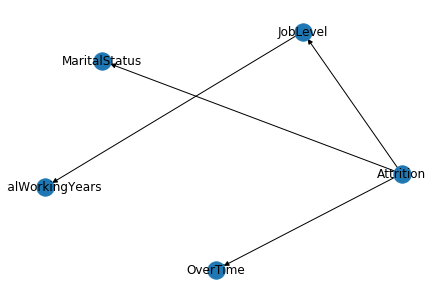

In [129]:
import networkx as nx
import pylab as plt
nx.draw(model, with_labels=True)
plt.show()

# Finding CPDs

In [66]:
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.factors.discrete import TabularCPD
model = BayesianModel([('Attrition', 'JobLevel'), ('Attrition', 'MaritalStatus'), ('Attrition', 'OverTime'), ('JobLevel', 'TotalWorkingYears')]
)
model.fit(df4)
model.get_cpds()

[<TabularCPD representing P(Attrition:2) at 0x1e513908>,
 <TabularCPD representing P(JobLevel:5 | Attrition:2) at 0x1e8ed148>,
 <TabularCPD representing P(MaritalStatus:3 | Attrition:2) at 0x1e513e08>,
 <TabularCPD representing P(OverTime:2 | Attrition:2) at 0x115b8d08>,
 <TabularCPD representing P(TotalWorkingYears:40 | JobLevel:5) at 0x116c2ec8>]

In [56]:
model.get_independencies()

(JobLevel _|_ MaritalStatus | OverTime)
(JobLevel _|_ MaritalStatus | TotalWorkingYears, OverTime)
(TotalWorkingYears _|_ MaritalStatus, OverTime | JobLevel)
(TotalWorkingYears _|_ MaritalStatus | OverTime)
(TotalWorkingYears _|_ OverTime | MaritalStatus, JobLevel)
(TotalWorkingYears _|_ MaritalStatus | JobLevel, OverTime)
(MaritalStatus _|_ TotalWorkingYears | JobLevel)
(MaritalStatus _|_ JobLevel, TotalWorkingYears | OverTime)
(MaritalStatus _|_ TotalWorkingYears | JobLevel, OverTime)
(MaritalStatus _|_ JobLevel | TotalWorkingYears, OverTime)
(OverTime _|_ TotalWorkingYears | JobLevel)
(OverTime _|_ TotalWorkingYears | MaritalStatus, JobLevel)

# Inference with VariableElimination

In [95]:
from pgmpy.inference import VariableElimination
hr_infer = VariableElimination(model)
prob_offer = hr_infer.query(variables = ['Attrition'])

Eliminating: OverTime: 100%|█████████████████████| 4/4 [00:00<00:00, 99.99it/s]


In [96]:
print(prob_offer)

+--------------+------------------+
| Attrition    |   phi(Attrition) |
+==============+==================+
| Attrition(0) |           0.8388 |
+--------------+------------------+
| Attrition(1) |           0.1612 |
+--------------+------------------+


# Get query with evidence

In [121]:
prob_Attrition=hr_infer.query(['Attrition'], evidence={"TotalWorkingYears":1,"JobLevel":0,"OverTime":1})
print(prob_Attrition)

Eliminating: MaritalStatus: 100%|███████████████| 1/1 [00:00<00:00, 249.99it/s]


+--------------+------------------+
| Attrition    |   phi(Attrition) |
+==============+==================+
| Attrition(0) |           0.5503 |
+--------------+------------------+
| Attrition(1) |           0.4497 |
+--------------+------------------+


# Inference with VariableElimination

In [123]:
from pgmpy.inference import BeliefPropagation
belief_propagation = BeliefPropagation(model)
res = belief_propagation.query(variables = ['Attrition'])

Eliminating: OverTime: 100%|████████████████████| 3/3 [00:00<00:00, 136.35it/s]


In [125]:
print (res)

+--------------+------------------+
| Attrition    |   phi(Attrition) |
+==============+==================+
| Attrition(0) |           0.8388 |
+--------------+------------------+
| Attrition(1) |           0.1612 |
+--------------+------------------+
